In [552]:
import requests
import pandas as pd
import numpy as np
import seaborn
import matplotlib.pyplot as plt
import statsmodels as sm
from scipy.optimize import minimize_scalar
import time

In [580]:
time.time()*1000

3795.531982421875

In [174]:
url = 'https://data.binance.com'
klines_url = '/api/v3/klines'
time_url = '/api/v3/time'

In [528]:
symbol1 = 'DOTBUSD'
symbol2 = 'SOLBUSD'
interval = '1h'  #MONTHLY
limit = 1000


In [807]:
DURATION = 10 * 24 * 3600 * 1000
TIME_NOW = int(time.time()*1000) - int(DURATION * 6)

params1 = {'symbol': symbol1, 'interval': interval, 'limit': limit, 'startTime': TIME_NOW - DURATION}
params2 = {'symbol': symbol2, 'interval': interval, 'limit': limit, 'startTime': TIME_NOW - DURATION}

# kline data format
#   [
#     1499040000000,      // Kline open time
#     "0.01634790",       // Open price
#     "0.80000000",       // High price
#     "0.01575800",       // Low price
#     "0.01577100",       // Close price
#     "148976.11427815",  // Volume
#     1499644799999,      // Kline Close time
#     "2434.19055334",    // Quote asset volume
#     308,                // Number of trades
#     "1756.87402397",    // Taker buy base asset volume
#     "28.46694368",      // Taker buy quote asset volume
#     "0"                 // Unused field, ignore.
#   ]


klines1 = requests.get(url+klines_url, params1).json()
klines2 = requests.get(url+klines_url, params2).json()

In [808]:
klines2

[[1675119600000,
  '23.78000000',
  '24.00000000',
  '23.71000000',
  '23.97000000',
  '128047.37000000',
  1675123199999,
  '3060201.45860000',
  6002,
  '79352.15000000',
  '1896943.50670000',
  '0'],
 [1675123200000,
  '23.97000000',
  '23.98000000',
  '23.66000000',
  '23.96000000',
  '119153.03000000',
  1675126799999,
  '2839596.19900000',
  6453,
  '52736.82000000',
  '1257499.18720000',
  '0'],
 [1675126800000,
  '23.96000000',
  '24.23000000',
  '23.80000000',
  '24.19000000',
  '144216.82000000',
  1675130399999,
  '3464626.81990000',
  7744,
  '81989.10000000',
  '1970759.31290000',
  '0'],
 [1675130400000,
  '24.19000000',
  '24.28000000',
  '24.06000000',
  '24.07000000',
  '74092.45000000',
  1675133999999,
  '1792525.58390000',
  3965,
  '39294.22000000',
  '950974.62970000',
  '0'],
 [1675134000000,
  '24.08000000',
  '24.13000000',
  '23.96000000',
  '24.01000000',
  '37152.20000000',
  1675137599999,
  '892771.21390000',
  2654,
  '17441.31000000',
  '419132.98040000'

In [809]:
klines_df1 = pd.DataFrame(np.array(klines1), columns=['open_time','open_price','high_price','low_price','close_price','volume','close_time','quote_asset_volume','number_of_trades','taker_buy_base_asset_volume','taker_buy_quote_asset_volume','unused'])
klines_df2 = pd.DataFrame(np.array(klines2), columns=['open_time','open_price','high_price','low_price','close_price','volume','close_time','quote_asset_volume','number_of_trades','taker_buy_base_asset_volume','taker_buy_quote_asset_volume','unused'])




In [810]:
klines_df_f1 = pd.DataFrame(klines_df1,dtype='float64')
klines_df_f2 = pd.DataFrame(klines_df2,dtype='float64')

# for i in range(len(klines_df_f1)):
#     if i > 300:
#         klines_df_f1['open_price'][i]-=0.2
#         pass
klines_df_f1

open_time  open_price  high_price  low_price  close_price     volume  \
0    1.675120e+12       6.176       6.195      6.157        6.190   24271.79   
1    1.675123e+12       6.189       6.221      6.142        6.207   55786.01   
2    1.675127e+12       6.207       6.236      6.179        6.214   39973.35   
3    1.675130e+12       6.217       6.269      6.212        6.222   44556.58   
4    1.675134e+12       6.226       6.232      6.205        6.216   22351.53   
..            ...         ...         ...        ...          ...        ...   
995  1.678702e+12       5.754       5.827      5.748        5.817   58662.61   
996  1.678705e+12       5.818       5.842      5.767        5.796   36410.59   
997  1.678709e+12       5.797       5.803      5.722        5.764   48070.45   
998  1.678712e+12       5.767       5.852      5.749        5.821   86191.11   
999  1.678716e+12       5.820       6.012      5.802        6.010  196064.84   

       close_time  quote_asset_volume  number_of_trades  \
0    1.675123e+12        1.500272e+05             859.0   
1    1.675127e+12        3.448870e+05            1613.0   
2    1.675130e+12        2.479757e+05            1232.0   
3    1.675134e+12        2.779787e+05            1141.0   
4    1.675138e+12        1.389984e+05             699.0   
..            ...                 ...               ...   
995  1.678705e+12        3.390571e+05            1708.0   
996  1.678709e+12        2.110873e+05            1836.0   
997  1.678712e+12        2.771035e+05            2335.0   
998  1.678716e+12        5.003881e+05            4170.0   
999  1.678720e+12        1.165859e+06            5756.0   

     taker_buy_base_asset_volume  taker_buy_quote_asset_volume  unused  
0                       11652.06                   72026.58953     0.0  
1                       27786.53                  171804.26836     0.0  
2                       25227.21                  156515.88405     0.0  
3                       24160.09                  150765.59578     0.0  
4                        9253.61                   57552.95939     0.0  
..                           ...                           ...     ...  
995                     36797.35                  212607.36708     0.0  
996                     20765.92                  120354.65967     0.0  
997                     21486.78                  123880.93223     0.0  
998                     40728.49                  236375.77214     0.0  
999                    106656.88                  634197.14779     0.0  

[1000 rows x 12 columns]

In [811]:
klines_df_f1['return'] = (klines_df_f1['close_price']-klines_df_f1['open_price'])/klines_df_f1['open_price']
klines_df_f1['return_prev'] = klines_df_f1['return'].shift(1)
klines_df_f1['open_time_year'] = klines_df_f1['open_time']/1000/3600/24/365
klines_df_f1['return']

klines_df_f2['return'] = (klines_df_f2['close_price']-klines_df_f2['open_price'])/klines_df_f2['open_price']
klines_df_f2['return_prev'] = klines_df_f2['return'].shift(1)
klines_df_f2['open_time_year'] = klines_df_f2['open_time']/1000/3600/24/365
klines_df_f2['return']

0      0.007990
1     -0.000417
2      0.009599
3     -0.004961
4     -0.002907
         ...   
995    0.016736
996   -0.007720
997   -0.007780
998    0.016196
999    0.056041
Name: return, Length: 1000, dtype: float64

In [812]:
returns_df = pd.DataFrame(np.array([klines_df_f1['return'],klines_df_f2['return']]).transpose(),columns=['btc','eth'])
returns_df

btc       eth
0    0.002267  0.007990
1    0.002908 -0.000417
2    0.001128  0.009599
3    0.000804 -0.004961
4   -0.001606 -0.002907
..        ...       ...
995  0.010949  0.016736
996 -0.003781 -0.007720
997 -0.005693 -0.007780
998  0.009364  0.016196
999  0.032646  0.056041

[1000 rows x 2 columns]

<AxesSubplot:xlabel='btc', ylabel='eth'>

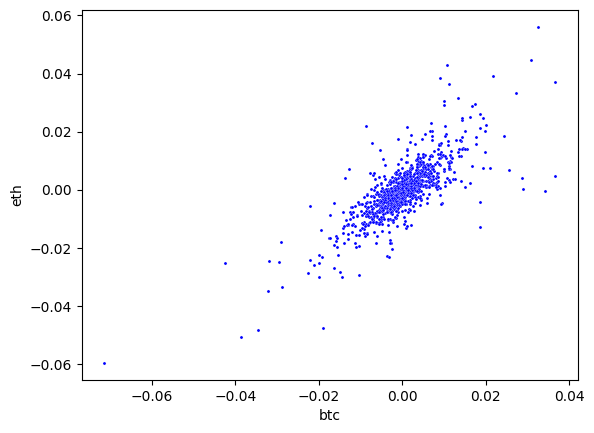

In [813]:
seaborn.scatterplot(data=returns_df,x='btc',y='eth',s=5,color='b')

<AxesSubplot:xlabel='return', ylabel='return_prev'>

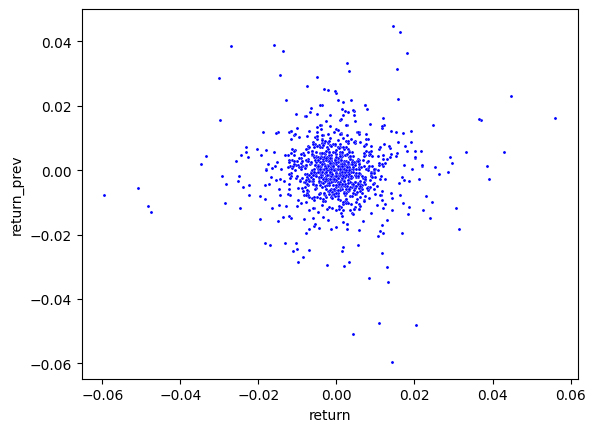

In [814]:
seaborn.scatterplot(data=klines_df_f2,x='return',y='return_prev',s=5,color='b')

In [815]:
# f1 price nonstationary
sm.tsa.stattools.adfuller(klines_df_f1['open_price'])

(-1.3527085793469562,
 0.6047267210136468,
 0,
 999,
 {'1%': -3.4369127451400474,
  '5%': -2.864437475834273,
  '10%': -2.568312754566378},
 -2971.1285932334295)

In [816]:
# f2 price nonstationary
sm.tsa.stattools.adfuller(klines_df_f2['open_price'])

(-1.4115670702472358,
 0.5767183288447755,
 0,
 999,
 {'1%': -3.4369127451400474,
  '5%': -2.864437475834273,
  '10%': -2.568312754566378},
 -245.39989763888502)

In [817]:
# f1 return stationary
sm.tsa.stattools.adfuller(klines_df_f1['return'])

(-30.60688574418639,
 0.0,
 0,
 999,
 {'1%': -3.4369127451400474,
  '5%': -2.864437475834273,
  '10%': -2.568312754566378},
 -6597.6541522900125)

In [818]:
# f2 return stationary
sm.tsa.stattools.adfuller(klines_df_f2['return'])

(-31.014138296493144,
 0.0,
 0,
 999,
 {'1%': -3.4369127451400474,
  '5%': -2.864437475834273,
  '10%': -2.568312754566378},
 -6246.6588079098065)

In [819]:
# Johansen test
jt = sm.tsa.vector_ar.vecm.coint_johansen(np.array([klines_df_f1['open_price'],klines_df_f2['open_price']]).transpose(),det_order=0,k_ar_diff=1)
print(f'Critical Value Eigen: \n{jt.cvm}\nCritical Value Trace: \n{jt.cvt}\n')
print(f'eigen stats: \n{jt.max_eig_stat}')
print(f'trace stats: \n{jt.trace_stat}')
                                              

Critical Value Eigen: 
[[12.2971 14.2639 18.52  ]
 [ 2.7055  3.8415  6.6349]]
Critical Value Trace: 
[[13.4294 15.4943 19.9349]
 [ 2.7055  3.8415  6.6349]]

eigen stats: 
[9.47404022 1.63438987]
trace stats: 
[11.1084301   1.63438987]


In [820]:
# Spread
df_p1 = klines_df_f1['open_price']
df_p2 = klines_df_f2['open_price']

def spread(p1, p2, n):
    psum = p1-p2*n
    return np.dot(psum,psum)

In [821]:
scalar_results = minimize_scalar(lambda n: spread(df_p1,df_p2, n))
N = scalar_results.x
scalar_results

     fun: 76.8369863378966
 message: '\nOptimization terminated successfully;\nThe returned value satisfies the termination criteria\n(using xtol = 1.48e-08 )'
    nfev: 9
     nit: 5
 success: True
       x: 0.2894142022835898

In [822]:
OPT_INTERVAL = 30 #10 hours

spread_data = pd.DataFrame([klines_df_f1['open_time'],klines_df_f1['open_price'],klines_df_f2['open_time'],klines_df_f2['open_price']]).transpose()
spread_data.columns = ['open_time1','open_price1','open_time2','open_price2']

spread_n = []
prev_scalar_x = None
i = 0
while i < len(klines_df_f1):
    # FIX SPREAD_NOW SO THAT IT DOESNT OPTIMIZE BASED ON OPT_INTERVAL AT EVERY STEP
    if i == OPT_INTERVAL or i == OPT_INTERVAL + 1:
        scalar_results = minimize_scalar(lambda n: spread(spread_data['open_price1'][i-OPT_INTERVAL:i],spread_data['open_price2'][i-OPT_INTERVAL:i], n))
        spread_n.append(scalar_results.x)
        
    elif i > OPT_INTERVAL + 1:
        scalar_results = minimize_scalar(lambda n: spread(spread_data['open_price1'][i-OPT_INTERVAL:i],spread_data['open_price2'][i-OPT_INTERVAL:i], n))
        
        # Simulate conditions for trading
        
        spread_prev = spread_data['open_price1'][i-1] - spread_n[i-1] * spread_data['open_price2'][i-1]
        spread_prev_prev = spread_data['open_price1'][i-2] - spread_n[i-2] * spread_data['open_price2'][i-2]
        
        if spread_prev_prev * spread_prev < 0:
            for j in range(OPT_INTERVAL):
                spread_n.append(None)
            i += OPT_INTERVAL
            scalar_results = minimize_scalar(lambda n: spread(spread_data['open_price1'][i-OPT_INTERVAL:i],spread_data['open_price2'][i-OPT_INTERVAL:i], n))
            spread_n.append(scalar_results.x)
            
            i += 1
            scalar_results = minimize_scalar(lambda n: spread(spread_data['open_price1'][i-OPT_INTERVAL:i],spread_data['open_price2'][i-OPT_INTERVAL:i], n))
            spread_n.append(scalar_results.x)
            
            i += 1
            scalar_results = minimize_scalar(lambda n: spread(spread_data['open_price1'][i-OPT_INTERVAL:i],spread_data['open_price2'][i-OPT_INTERVAL:i], n))
            spread_n.append(scalar_results.x)
        else:
            spread_n.append(spread_n[i-1])
            
        # End of simulation
        
        #spread_n.append(scalar_results.x)
    else:
        spread_n.append(None)
        
    i += 1

spread_data['spread_n'] = spread_n[0:len(spread_data)]
spread_data['spread'] = spread_data['open_price1'] - spread_data['spread_n'] * spread_data['open_price2']
spread_data['position_size'] = spread_data['open_price1']+ spread_data['spread_n'] * spread_data['open_price2']
spread_data['spread_percentage'] = spread_data['spread']/spread_data['position_size']*100

len(spread_data)    

1000

<AxesSubplot:xlabel='open_time1', ylabel='spread_n'>

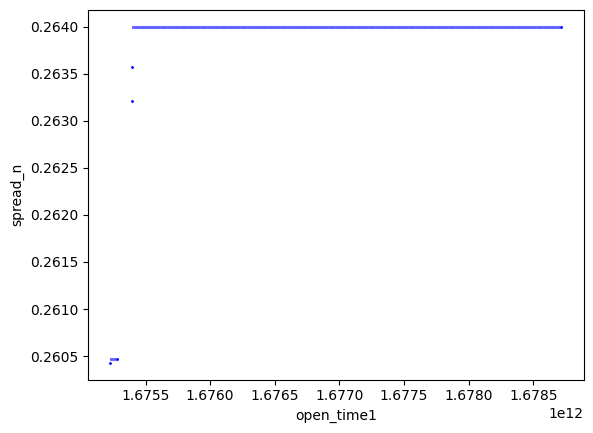

In [823]:
# Graph spread_n

seaborn.scatterplot(data=spread_data,x='open_time1',y='spread_n',s=5,color='b')

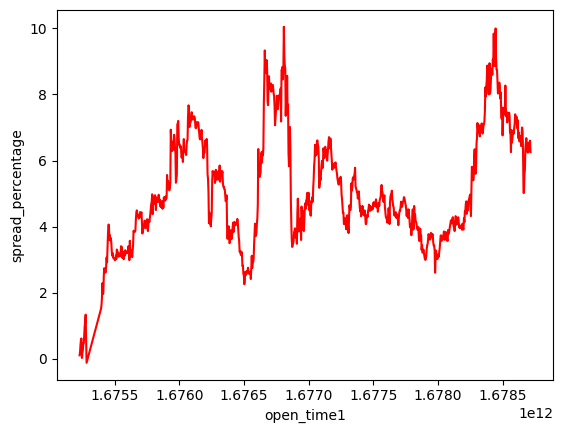

In [824]:
ax = seaborn.lineplot(data=spread_data,x='open_time1',y='spread_percentage',color='r')
# ax.set(ylim=(-0.12,0.01))
# ax.set(xlim=(5.2e7+1.6801e12,6e7+1.6801e12))

<AxesSubplot:xlabel='open_time1', ylabel='spread'>

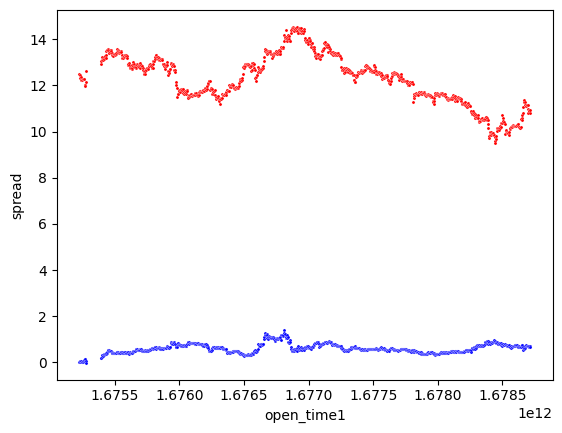

In [825]:
# graph_df = pd.DataFrame(np.array([klines_df_f1['open_time'],klines_df_f1['open_price'] - N * klines_df_f2['open_price']]).transpose(),columns = ['open_time','price'])
# seaborn.scatterplot(data=graph_df,x='open_time',y='price',s=5,color='b')

seaborn.scatterplot(data=spread_data,x='open_time1',y='spread',s=5,color='b')
seaborn.scatterplot(data=spread_data,x='open_time1',y='position_size',s=5,color='r')



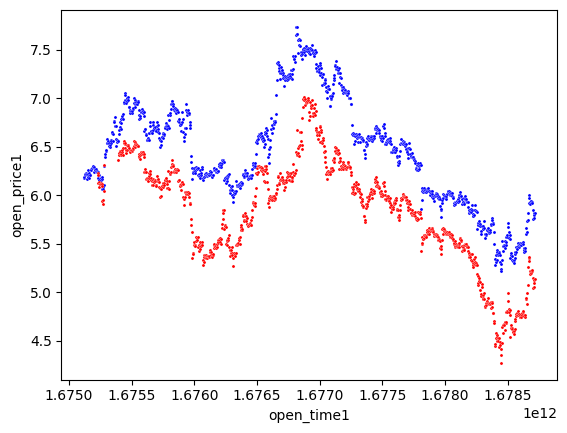

In [826]:
# HAVE NOT UPDATED

seaborn.scatterplot(data=spread_data,x='open_time1',y='open_price1',s=5,color='b')
spread_data['scaled_price2'] = spread_data['open_price2'] * spread_data['spread_n']
ax = seaborn.scatterplot(data=spread_data,x='open_time1',y='scaled_price2',s=5,color='r')
# ax.set(ylim=(0,10))
# ax.set(xlim=(5.2e7+1.6801e12,6e7+1.6801e12))

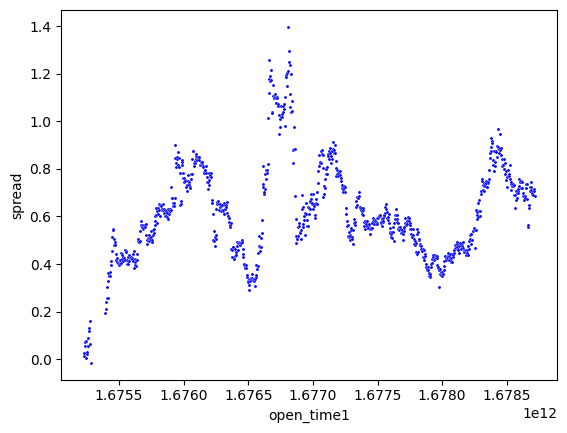

In [827]:
ax = seaborn.scatterplot(data=spread_data,x='open_time1',y='spread',s=5,color='b')
# ax.set(xlim=(5.2e7+1.6801e12,5.4e7+1.6801e12))

In [828]:
spread_data['spread_prev'] = spread_data['spread'].shift(1)
spread_data['spread_return'] = (spread_data['spread']-spread_data['spread_prev'])/spread_data['spread_prev']
spread_data['spread_return_prev'] = spread_data['spread_return'].shift(1)

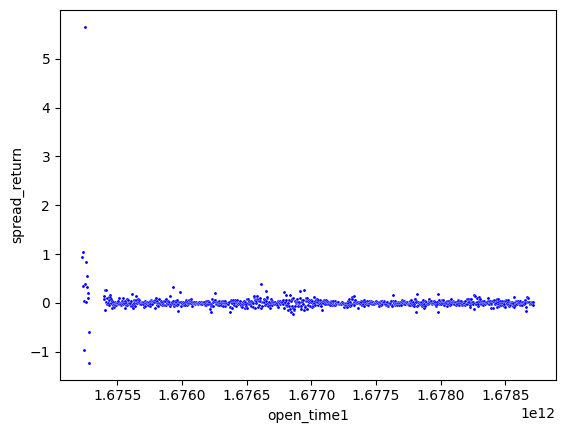

In [829]:
ax = seaborn.scatterplot(data=spread_data,x='open_time1',y='spread_return',s=5,color='b')

-0.022583994962762102

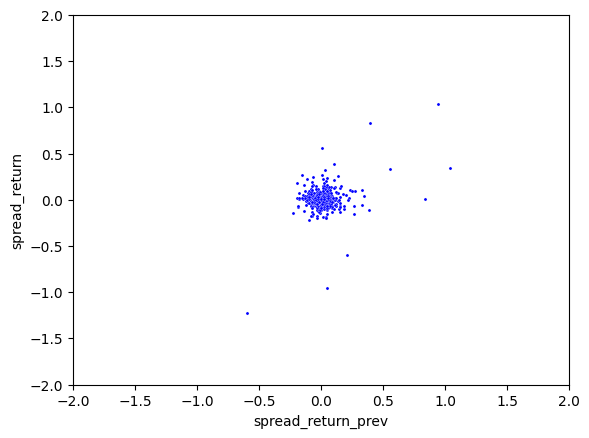

In [830]:
ax = seaborn.scatterplot(data=spread_data,x='spread_return_prev',y='spread_return',s=5,color='b')
ax.set(xlim=(-2,2))
ax.set(ylim=(-2,2))
spread_data['spread_return_prev'].corr(spread_data['spread_return'])